          Date/Time      Lat      Lon    Base
0  9/1/2014 0:01:00  40.2201 -74.0021  B02512
1  9/1/2014 0:01:00  40.7500 -74.0027  B02512
2  9/1/2014 0:03:00  40.7559 -73.9864  B02512
3  9/1/2014 0:06:00  40.7450 -73.9889  B02512
4  9/1/2014 0:11:00  40.8145 -73.9444  B02512
{'B02617': 377695, 'B02598': 240600, 'B02682': 197138, 'B02764': 178333, 'B02512': 34370}


<Axes: >

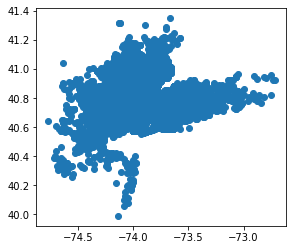

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point


uber_df = pd.read_csv("uber-raw-data-sep14.csv")
print(uber_df.head(5))

#выделяю все станции Uber с количеством вызовов по каждой
st_dct = uber_df['Base'].value_counts().to_dict()
print(st_dct)


#lat = uber_df['Lat'].values
#lon = uber_df['Lon'].values


#выношу все точки без деления на станции!!!
loc_geom = [Point(xy) for xy in zip(uber_df['Lon'], uber_df['Lat'])]
geo_df = gpd.GeoDataFrame(uber_df, crs='epsg:4326', geometry=loc_geom)
# сейчас выносятся все точки в целом без деления на станции
#нужно:
# 1. отобразить карту нью йорка
# 2. нанести точки в соответствии с каждой из баз выделить каждую новым цветом

# Plot the GeoDataFrame
geo_df.plot()
